In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from dys_functions import *

sns.set()

In [4]:
metadata_path = './data/metadata.xlsx'
svc_path = './data/svcs/'
metadata_path_extra = './Dysgraphia-detection-through-machine-learning-main/data2_SciRep_pub.xlsx'
svc_path_extra = './Dysgraphia-detection-through-machine-learning-main/dataSciRep_public/'

data = load_data(metadata_path, metadata_path_extra, svc_path, svc_path_extra)
metadata_new, metadata_extra, svc_data, svc_indexes = data

In [26]:
metadata_train = pd.read_csv('train_orig.csv')

### Metadata analysis

In [6]:
import seaborn as sns

sns.set()

In [7]:
metadata_new.describe()

new_class         age         sex         DYS
count  459.000000  394.000000  459.000000  459.000000
mean     1.793028    7.847716    1.411765    0.117647
std      1.559124    1.672151    0.492690    0.322541
min      0.000000    5.000000    1.000000    0.000000
25%      0.000000    6.000000    1.000000    0.000000
50%      2.000000    8.000000    1.000000    0.000000
75%      3.000000    9.000000    2.000000    0.000000
max      5.000000   11.000000    2.000000    1.000000

/home/xforman/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


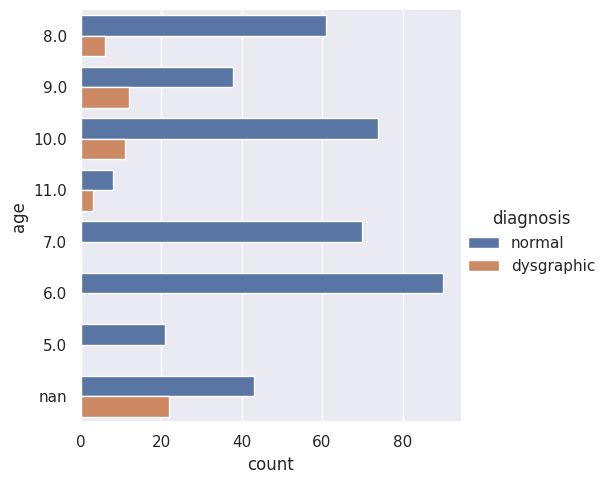

In [33]:
meta_graph = metadata_train
meta_graph["diagnosis"] = metadata_new["DYS"].replace({0: "normal", 1:"dysgraphic"})
meta_graph = meta_graph.sort_values("age")
meta_graph["age"] = metadata_new.age.astype(str)
sns.catplot(meta_graph, kind='count', y='age', hue='diagnosis');

/home/xforman/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


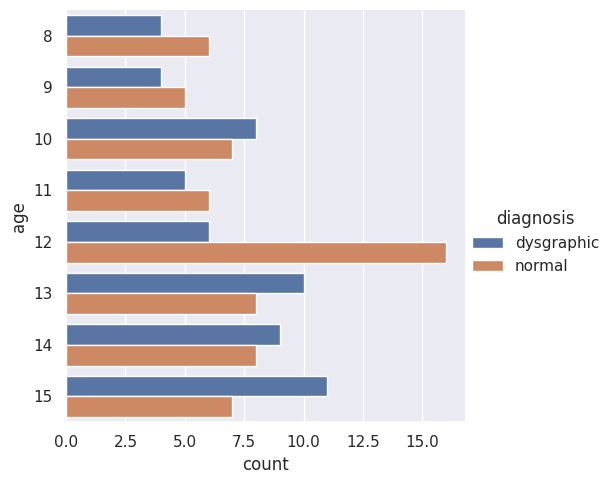

In [35]:
meta_graph = metadata_extra
meta_graph["diagnosis"] = meta_graph["DYS"].astype(int).replace({0: "normal", 1:"dysgraphic"})
meta_graph = meta_graph.sort_values("age")
meta_graph["age"] = meta_graph.age.astype(str)
sns.catplot(meta_graph, kind='count', y='age', hue='diagnosis');

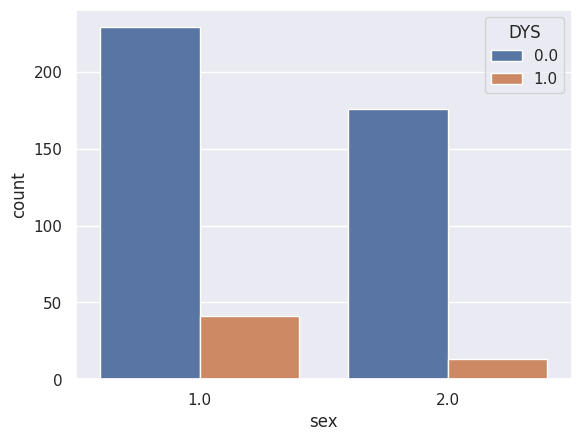

In [19]:
sns.countplot(metadata_new, x='sex', hue='DYS');

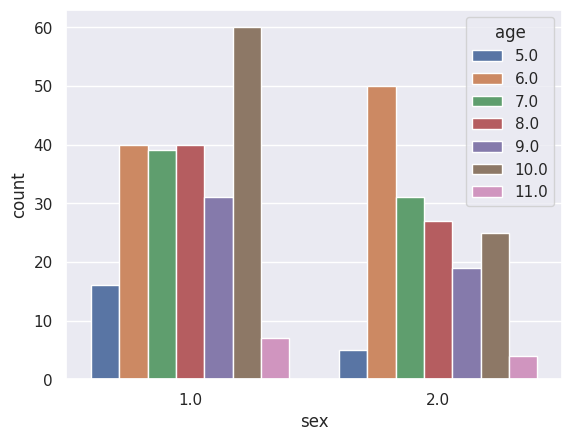

In [20]:
sns.countplot(metadata_new, x='sex', hue='age');

Here we experimentally remove half of the dataset, since there is no representation of dysgraphic children under the age 8. Also we suspect that the drawing differences in children of different ages are larger then the differences between the dysgraphic and normal children of the same age (especially between the youngest and oldest).

/tmp/ipykernel_4097551/1487886386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(metadata_train.corr(), annot=True)


<Axes: >

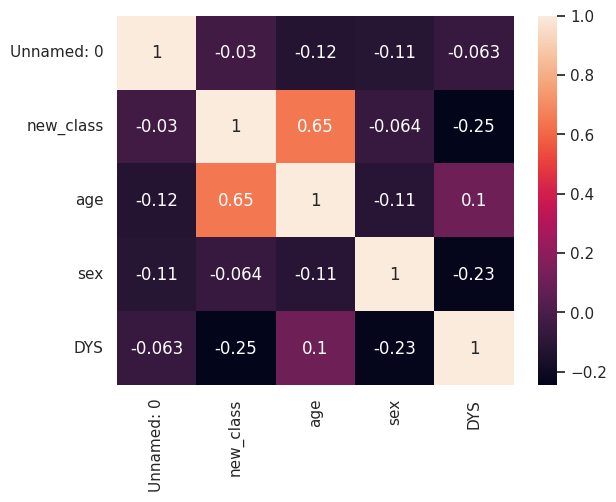

In [21]:
sns.heatmap(metadata_train.corr(), annot=True)

### Tablet output analysis

In [8]:
import altair as alt

In [9]:
svc_single = svc_indexes.merge(metadata_train, how='inner', on='filename')
svc_single.fileindex = svc_single.fileindex.astype(int)
svc_normal_10 = svc_single[(svc_single.DYS == 0) & (svc_single.tsk == '11')
          & (svc_single.age == 10)]

svc_dys_10 = svc_single[(svc_single.DYS == 1) & (svc_single.tsk == '11')
          & (svc_single.age == 10)]

svc_normal_10.head(5)

filename tsk  fileindex  Unnamed: 0  new_class   age  sex  DYS
31    BH1401  11         61          21          4  10.0  1.0  0.0
41    BH1402  11         71          78          4  10.0  1.0  0.0
71    BH1405  11        101          56          4  10.0  1.0  0.0
91    BH1407  11        121          92          4  10.0  1.0  0.0
101   BH1408  11        131          33          4  10.0  1.0  0.0

In [10]:
def plot_drawing(x):
    to_plot = svc_data[x] - np.min(svc_data[x], axis=0)
    print(svc_data[x][2][-1])
    to_plot = pd.DataFrame(to_plot, columns=['x', 'y', 'time', 'onpaper', 
                                           'tilt1', 'tilt2', 'pressure'])
    return alt_plot(to_plot)
    
    
def alt_plot(to_plot):
    to_plot -= np.min(to_plot, axis=0)
    interval = alt.selection_interval()
    return alt.Chart(to_plot.reset_index()).mark_circle().encode(
        x= alt.X('x', scale=alt.Scale(domain=[-10, 60])),
        y= alt.Y('y', scale=alt.Scale(domain=[-10, 60])),
        color='pressure'    #alt.condition(interval, 'onpaper',
                            #alt.value('lightgray'))
    ).add_params(
        interval
    ).interactive()

In [11]:
from ipywidgets import interact

interact(plot_drawing, x=svc_single[(svc_single.DYS == 1)
                                & (svc_single.tsk == '10')
                                & (svc_single.age == 10)].fileindex)

interactive(children=(Dropdown(description='x', options=(110, 1509, 1689, 1915, 2315, 2355, 3952, 4349, 4417),…

<function __main__.plot_drawing(x)>

In [38]:
interact(plot_drawing, x=svc_single[(svc_single.DYS == 0)
                                & (svc_single.tsk == '10')
                                & (svc_single.age == 10)].fileindex)

interactive(children=(Dropdown(description='x', options=(60, 70, 100, 120, 130, 140, 450, 480, 490, 640, 1059,…

<function __main__.plot_drawing(x)>

In [39]:
svc_single[(svc_single.DYS == 0)
        & (svc_single.tsk == '11')
        & (svc_single.age == 8)]

filename tsk  fileindex  Unnamed: 0  new_class  age  sex  DYS
1      BH1201  11          1         146          2  8.0  1.0  0.0
11     BH1203  11         21          66          2  8.0  2.0  0.0
121    BR1210  11        211         105          2  8.0  2.0  0.0
131    BR1215  11        261          52          2  8.0  2.0  0.0
141    BR1217  11        281          42          2  8.0  1.0  0.0
151    BR1218  11        291          53          2  8.0  2.0  0.0
161    BR1221  11        321          90          2  8.0  2.0  0.0
191    BR1325  11        381         138          3  8.0  1.0  0.0
311    BR3102  11        511          34          1  8.0  2.0  0.0
331    BR3302  11        611         121          3  8.0  2.0  0.0
361    BR4205  11        800          18          2  8.0  2.0  0.0
371    BR4207  11        820          35          2  8.0  1.0  0.0
381    BR4209  11        840         106          2  8.0  1.0  0.0
391    BR4211  11        860           2          2  8.0  2.0  0.0
401    BR4213  11        880         124          2  8.0  2.0  0.0
411    BR4217  11        920          17          2  8.0  1.0  0.0
421    BR4220  11        950         139          2  8.0  1.0  0.0
431    BR4221  11        960         159          2  8.0  2.0  0.0
441    BR4223  11        980         135          2  8.0  2.0  0.0
761    BR5106  11       1570         150          1  8.0  1.0  0.0
771    BR5202  11       1620         161          2  8.0  1.0  0.0
781    BR5204  11       1640          30          2  8.0  1.0  0.0
791    BR5205  11       1650         142          2  8.0  2.0  0.0
837    BR5306  11       1726         148          3  8.0  1.0  0.0
927    BR7207  11       2076         155          2  8.0  1.0  0.0
937    BR7209  11       2096         149          2  8.0  1.0  0.0
947    BR7210  11       2106          95          2  8.0  1.0  0.0
1007   BR8201  11       2186         128          2  8.0  1.0  0.0
1017   BR8203  11       2206          60          2  8.0  1.0  0.0
1027   BR8206  11       2236         125          2  8.0  2.0  0.0
1037   BR8301  11       2256         154          3  8.0  1.0  0.0
1047   BR8302  11       2266          40          3  8.0  1.0  0.0
1067   BR8304  11       2286          72          3  8.0  2.0  0.0
1127   HK1102  11       3893         158          1  8.0  2.0  0.0
1137   HK1103  11       3903         108          1  8.0  1.0  0.0
1147   HK1105  11       3923          28          1  8.0  2.0  0.0
1157   HK1107  11       3943          39          1  8.0  2.0  0.0
1457   HK6203  11       4478          98          2  8.0  1.0  0.0
1507   HK7201  11       4648           7          2  8.0  2.0  0.0
1517   HK7202  11       4658          81          2  8.0  1.0  0.0
1527   HK7204  11       4678          89          2  8.0  1.0  0.0
1537   HK7205  11       4688         123          2  8.0  1.0  0.0
1547   HK7206  11       4698         164          2  8.0  2.0  0.0
1557   HK7207  11       4708         117          2  8.0  1.0  0.0
1567   HK7209  11       4728         110          2  8.0  2.0  0.0
1577   HK7210  11       4738          54          2  8.0  2.0  0.0
1627   HK7305  11       4788         100          3  8.0  2.0  0.0
1667   HK7311  11       4848          14          3  8.0  2.0  0.0

interact(plot_drawing, x=svc_single[(svc_single.DYS == 0)
                                & (svc_single.tsk == '11')
                                & (svc_single.age == 5)].fileindex);